In [ ]:
%pylab inline

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
# from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML

import matplotlib.patches as patches
    
# import matplotlib
# matplotlib.rcParams['animation.embed_limit'] = 2**128
matplotlib.rcParams.update({'font.size': 10})
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def Rotz(Θ):
    R = array([[cos(Θ), -sin(Θ),0], [sin(Θ), cos(Θ),0],[0,0,1]])
    return R

def Roty(Θ):
    R = array([[cos(Θ), sin(Θ)], [-sin(Θ), cos(Θ)]])
    return R


def plotsim(x_log):
    x_log = array(x_log)
#     F_log = array(F_log)
#     print(len(x_log[:,0]))
    # subplot(2,1,1)
    plt.figure(figsize=(10,5))
    plot(x_log[:,0], x_log[:,1])
    xlabel('x')
    ylabel('z')
    plt.tight_layout()
    fig = plt.figure(figsize=(10,5))
    subplot(3,2,1)
    plot(time[:],x_log[:-1,0])
    xlabel('t')
    ylabel('x')
    subplot(3,2,2)
    plot(time[:],x_log[:-1,1])
    xlabel('t')
    ylabel('z')
    subplot(3,2,3)
    plot(time[:],x_log[:-1,2])
    xlabel('t')
    ylabel('dx')
    subplot(3,2,4)
    plot(time[:],x_log[:-1,3])
    xlabel('t')
    ylabel('dz')    
    plt.tight_layout()
    plt.show()
    
def plotsim2(x_log):
    x_log = array(x_log)
#     F_log = array(F_log)
#     print(len(x_log[:,0]))
    # subplot(2,1,1)
#     plt.figure(figsize=(10,5))
#     plot(x_log[:,0], x_log[:,1])
#     xlabel('x')
#     ylabel('z')
#     plt.tight_layout()
    fig = plt.figure(figsize=(10,5))
    subplot(3,3,1)
    plot(time[:],x_log[:-1,0])
    xlabel('t')
    ylabel('x')
    subplot(3,3,2)
    plot(time[:],x_log[:-1,1])
    xlabel('t')
    ylabel('z')
    subplot(3,3,3)
    plot(time[:],x_log[:-1,2])
    xlabel('t')
    ylabel('phi')
    subplot(3,3,4)
    plot(time[:],x_log[:-1,3])
    xlabel('t')
    ylabel('dx') 
    subplot(3,3,5)
    plot(time[:],x_log[:-1,4])
    xlabel('t')
    ylabel('dz') 
    subplot(3,3,6)
    plot(time[:],x_log[:-1,5])
    xlabel('t')
    ylabel('dphi') 
    plt.tight_layout()
    plt.show()    

# HW 1



## E2 -Slope and ball launch

<div>
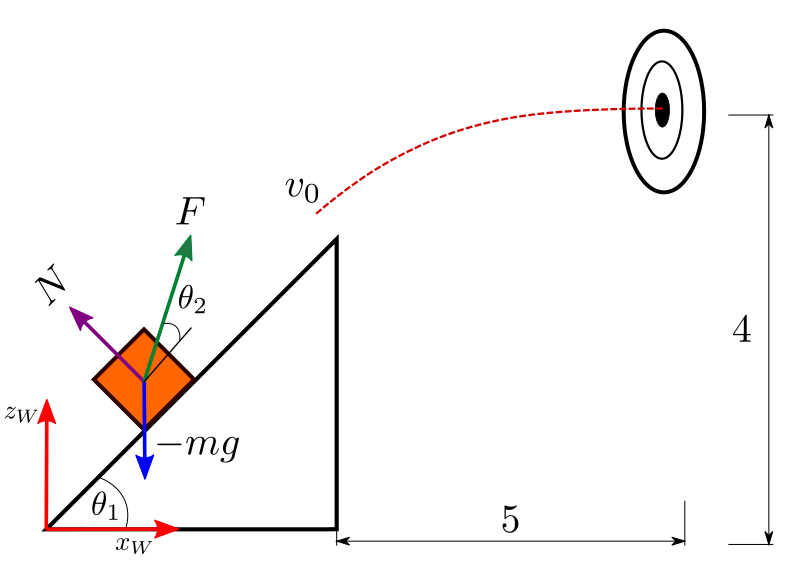
</div>

This problem is divided by tow problems. the fist one is to find the equations that describe the box in the slope, and the second one is to find the equations that describe the box in free fall.

#### Solving the first one problem:

<div>
<img src="fig2.png" width="300"/>
</div>


$
\begin{eqnarray}
    \sum F_{x_b} &=& ma_x\\ 
    \sum F_{y_b} &=& 0
\end{eqnarray}
$

$
\begin{eqnarray}
    a_{y_b} &=& N = mg\cos(\theta_1)-F\sin(\theta_2)\\ 
    a_{x_b} &=& \frac{F\cos(\theta_2)-mg\sin(\theta_1)}{m}
\end{eqnarray}
$


Finally moving to the world frame 

$
\begin{eqnarray}
    \left [
    \begin{array}{c}
        a_{x_W}\\
        a_{y_W}
    \end{array}
    \right ]
    &=&
    Rot(y,\theta_1)   
    \left [
    \begin{array}{c}
        a_{x_b}\\
        a_{y_b}
    \end{array}
    \right ]    
\end{eqnarray}
$


#### Solving the second one problem (Proyectile motion):

Using the displacement equation, where $\alpha$ is the initial angle and $v_0$ is the velociy magnitud:

$
\begin{eqnarray}
    x &=& x_0 + v_0 \cos(\alpha t)\\
    y &=& y_0 + v_0 \sin(\alpha t) + \frac{1}{2}at^2
\end{eqnarray}
$

We can use the displacement equations in the x and y direction to obtain an equation for the parabolic form of a projectile motion:

$
\begin{eqnarray}
    y &=& x\tan(\alpha) - \frac{gx^2}{2 v_0 \cos^2(\alpha)}
\end{eqnarray}
$

Then, If the proyectile has one initial angle same as a the slope of the ramp $\theta_1=\alpha=45^o$ we obteined the exactly inicial velocity by: 

$
\begin{eqnarray}
    v_0 &=& \sqrt{\frac{gx^2}{2 \cos^2(\theta_1)(y - x \tan(\theta_1))}}
    &=& 15.6525
\end{eqnarray}
$



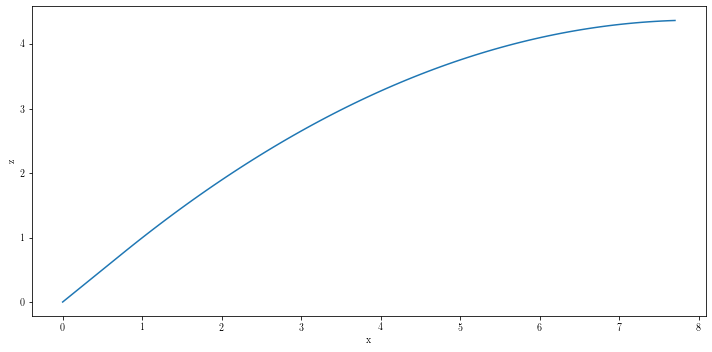

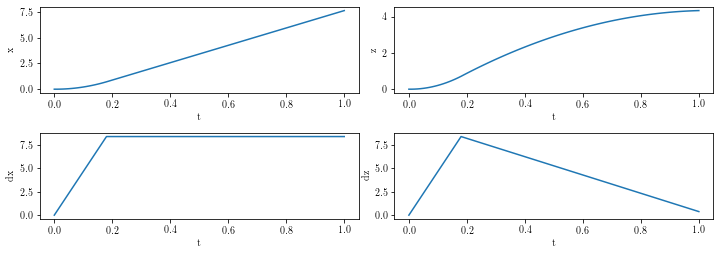

In [7]:
def simulate(x, t):

    if x[0] <= 0.7071:
    
        θ1 = -45*(pi/180)
        θ2 = 0*(pi/180)

        F = 80
        fnx = (m*g*sin(θ1) + F*cos(θ2))/m 
        fny =  m*g*cos(θ1) - F*sin(θ2)

        Fnet = Roty(θ1).dot(array([fnx,fny]))
    #     print(Fnet)

        dx = concatenate((x[2:4], Fnet - m*g*array([0,1.]) ), axis=None) 
        x += dx * Δt
        
    else:
        dx = concatenate((x[2:4], -g*array([0., 1])), axis=None)   
        x += dx * Δt

        if x[1] < 0 :
            x[1]=0.      
    
    
    return x


tf = 1
Δt = 0.01    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval
g = 9.8
m = 1.

# Initial conditions
v0 = 0
x_0 = array([0., 0.])
dx_0 = array([0., 0.])
ddx_0 = - m * g * array([0., 0])


x = concatenate((x_0, dx_0/m), axis=None)


x_log = [copy(x)]


for t in time:
    x = simulate(x, t)
    x_log.append(copy(x))
    
x_log = array(x_log)
plotsim(x_log)


In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
x_log = array(x_log)

def animate(t):
    ax.clear()
    
    # Path
#     plot(x_log[:,0], x_log[:,1])

    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo', markersize=50)
#     plt.quiver()
    
    
print(len(time))

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(time), interval=100)

# anim.save('HW1_E2.gif', writer='imagemagick')

HTML(anim.to_jshtml())


## HW2 (part 2/2) 


<div>
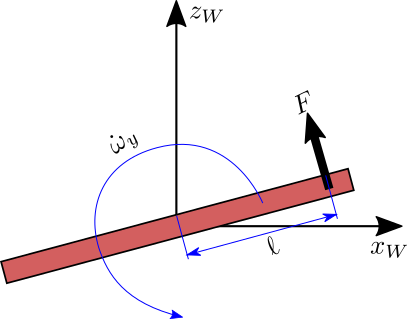
</div>

$
\begin{eqnarray}
\overrightarrow{\tau} &=& \overrightarrow{p} \times \overrightarrow{f}\\
&=& \left[
    \begin{array}{c}
        0\\
        \ell \\
        0
    \end{array}
    \right ] 
    \times
    \left[
    \begin{array}{c}
        0\\
        0\\
        f_z
    \end{array}
    \right ]  \\
\Rightarrow \tau_{y}&=& -\ell f_z    
\end{eqnarray}
$

Euler's rotation equations:

$
\begin{eqnarray}
\tau &=& I\dot{\omega} + \omega \times I \omega  \\
\therefore \dot{\omega} &=& \frac{\tau}{I}\
\end{eqnarray}
$

Control:

$
\begin{eqnarray}
e_\phi &=& \phi^d - \phi \\
e_{{\omega}} &=& {\omega}^d - {\omega} \\
\end{eqnarray}
$

$f_z = u = k_p e_\phi + k_d e_{{\omega}}$


1002
1001


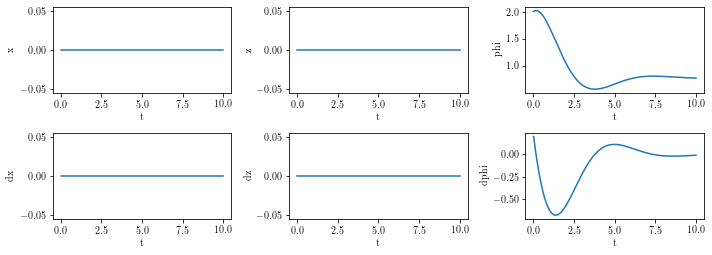

In [6]:
def control(x):
    eϕ = pi/4 - x[2]
    edω = 0 - x[5]
    u = 1*eϕ + 1*edω
#     print(x[2])
    return u

def simulate(x,u,t):
    
    Ft = array([0,0])
    
    τ = ℓ*u
    
    ω = τ/Iyy 
    Ftotal = array([Ft[0], Ft[1], ω])

    dx = concatenate((x[3:6], Ftotal), axis=None)  
    x += dx * Δt
    
    return [x, Ftotal]


tf = 10.
Δt = 0.01    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval
g = 9.8
ℓ = 1.
d = 1
u=0
m=1.
Iyy = 1

dx_0 = array([0., 0., 0.2])
x_0 = array([0., 0., 2])

x = concatenate((x_0, dx_0/m), axis=None)
F = array([0., 0.])

x_log = [copy(x)]
F_log = [copy(F)]
for t in time:
    [x, F] = simulate(x,u,t)
    u = control(x)
    x_log.append(copy(x))
    F_log.append(copy(F))

print(len(x_log))
print(len(time))
plotsim2(x_log)

In [ ]:

    

fig, ax = plt.subplots(figsize=(5, 5))
x_log = array(x_log)

def animate(t):
    ax.clear()
    
    # Path
    angle = x_log[t,2]
    
    c = Roty((-angle)).dot([-5, -0.5])

    ax.add_patch( Rectangle((c[0], c[1]), 10, 1, angle=(angle*(180/pi)), color='b', fill=True)) 
    ax.axis([-10, 10, -10, 10])
    
    vec =  Roty(-angle).dot([4.5, 0.])
    dvec =  Roty(-angle).dot([0., 2])

    ax.add_patch(Arrow(vec[0], vec[1], dvec[0], dvec[1], width=2.0))    
    

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(time), interval=20)

# HTML(anim.to_jshtml())
display(HTML(anim.to_jshtml()))

## HW 2 (with constraints)

Now we include one constraint $f_z > -0.1$

In [ ]:
def control(x):
    eϕ = pi/4 - x[2]
    edϕ = 0 - x[5]
    u = 1*eϕ + 1*edϕ
    
    if u < -0.1: 
        u = -0.1
    
    return u

def simulate(x,u,t):
    
    Ft = array([0,0])
    
    τ = ℓ*u
    
    ω = τ/Iyy 
    Ftotal = array([Ft[0], Ft[1], ω])
#     print(Ftotal)
    dx = concatenate((x[3:6], Ftotal), axis=None)  
    x += dx * Δt
    
    return [x, Ftotal]


tf = 20.
Δt = 0.01    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval
g = 9.8
ℓ = 1.
d = 1
u=0
τ = -ℓ
Iyy = 1

dx_0 = array([0., 0., 0.01])
x_0 = array([0., 0., 0.])

x = concatenate((x_0, dx_0/m), axis=None)
F = array([0., 0.])

x_log = [copy(x)]
F_log = [copy(F)]
for t in time:
    u = control(x)
    [x, F] = simulate(x,u,t)
    x_log.append(copy(x))
    F_log.append(copy(F))
    
# sol = odeint(simulate, x, t, args=(m, ℓ, ))    


plotsim2(x_log)

In [ ]:

    

fig, ax = plt.subplots(figsize=(5, 5))
x_log = array(x_log)

def animate(t):
    ax.clear()
    
    # Path
    angle = x_log[t,2]
    
    c = Roty((-angle)).dot([-5, -0.5])

    ax.add_patch( Rectangle((c[0], c[1]), 10, 1, angle=(angle*(180/pi)), color='b', fill=True)) 
    ax.axis([-10, 10, -10, 10])
    
    vec =  Roty(-angle).dot([4.5, 0.])
    dvec =  Roty(-angle).dot([0., 2])

    ax.add_patch(Arrow(vec[0], vec[1], dvec[0], dvec[1], width=2.0))    
    

anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(time), interval=20)

# HTML(anim.to_jshtml())
display(HTML(anim.to_jshtml()))

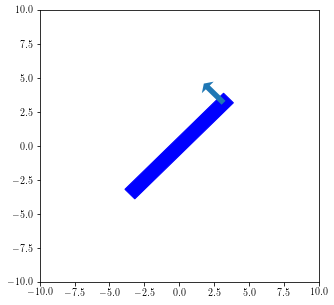

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

angle = 45
    
c = Roty((-angle*(pi/180))).dot([-5, -0.5])

ax.add_patch( Rectangle((c[0], c[1]), 10, 1, angle=(angle), color='b', fill=True)) 
ax.axis([-10, 10, -10, 10])

vec =  Roty((-angle*(pi/180))).dot([4.5, 0.])
dvec =  Roty((-angle*(pi/180))).dot([0., 2])

ax.add_patch(Arrow(vec[0], vec[1], dvec[0], dvec[1], width=2.0))